In [66]:
import os
import pandas as pd
import numpy as np
import seaborn as sns


In [67]:
#Describe some features of data
#statesinfo dataset has 51 observations from CSV file contains 9 variables: 
#X:(state), region, pop: population of high school students who took SAT, SATV: S.A.T. verbal score, 
#SATM: S.A.T math score, percent(percentage of graduating high school students who take S.A.T),
#dollars(state spending on public education in $1000 per student), pay:(average teachers salary), divide(categorical)- 
#North or South US

statesinfo_raw = sns.load_dataset('statesinfo')
statesinfo_raw.info()
statesinfo_raw.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
states     51 non-null object
region     51 non-null object
pop        51 non-null int64
SATV       51 non-null int64
SATM       51 non-null int64
percent    51 non-null int64
dollars    51 non-null float64
pay        51 non-null int64
divide     51 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 3.7+ KB


,states,region,pop,SATV,SATM,percent,dollars,pay,divide
0,Alabama,ESC,4041,470,514,8,3.648,27,South
1,Alaska,PAC,550,438,476,42,7.887,43,North
2,Arizona,MTN,3665,445,497,25,4.231,30,South
3,Arkansas,WSC,2351,470,511,6,3.334,23,South
4,California,PAC,29760,419,484,45,4.826,39,North


In [89]:
#provides summary statistic of numeric variables with describe function
statesinfo_raw.describe()

,pop,SATV,SATM,percent,dollars,pay
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,4876.647059,448.156863,497.392157,33.745098,5.175490,30.941176
std,5439.202691,30.821014,34.568817,24.073922,1.376166,5.308151
min,454.000000,397.000000,437.000000,4.000000,2.993000,22.000000
25%,1215.000000,422.500000,470.000000,11.500000,4.354000,27.500000
50%,3294.000000,443.000000,490.000000,25.000000,5.045000,30.000000
75%,5780.000000,474.500000,522.500000,57.500000,5.689500,33.500000
max,29760.000000,511.000000,577.000000,74.000000,9.159000,43.000000


In [90]:
# Summary statistics by subgroup of categorical variable region

#used group by to find the groups of data, and calculated size(samples within a region), used aggreg. function of mean and SD of pop population of high school students who took SAT, 
#SATV: S.A.T. verbal score, SATM: S.A.T math score, percent(percentage of graduating high school students who take S.A.T),
#dollars(state spending on public education in $1000 per student), pay:(average teachers salary)
#sorted values by dollars

(statesinfo_raw.groupby(['region'])
.agg(['mean','std','size'])
.sort_values(by = ('dollars','mean'), ascending = False))

pop                           SATV                  \
                mean           std size        mean        std size   
region                                                                
MA      12534.000000   5160.981302    3  416.666667   4.163332    3   
NE       2201.000000   2097.191551    6  429.166667   7.250287    6   
PAC      7825.400000  12377.075495    5  427.400000  15.469324    5   
SA       4840.666667   3868.695484    9  417.444444  16.356276    9   
ENC      8401.800000   3018.218796    5  450.800000  26.023067    5   
WNC      2522.857143   1732.324587    7  492.571429  15.131172    7   
MTN      1707.375000   1166.738426    8  461.875000  18.395943    8   
WSC      6676.000000   6916.530489    4  459.250000  31.020155    4   
ESC      3794.000000    955.095109    4  475.750000   5.619905    4   

              SATM                    percent                   dollars  \
              mean        std size       mean        std size      mean   
region                                                                    
MA      468.666667   5.131601    3  67.666667   3.214550    3  8.064333   
NE      470.000000   9.077445    6  66.166667   5.810909    6  6.398667   
PAC     482.200000   3.898718    5  46.400000   4.037326    5  5.611400   
SA      459.444444  19.481473    9  52.000000  15.198684    9  5.551000   
ENC     508.600000  32.176078    5  23.000000  17.860571    5  5.391000   
WNC     550.571429  17.395949    7   8.857143   3.579040    7  4.474143   
MTN     513.375000  17.154237    8  18.000000   7.745967    8  4.335250   
WSC     503.000000  28.425341    4  16.500000  17.058722    4  3.831500   
ESC     519.750000   4.573474    4   8.500000   3.415650    4  3.766750   

                             pay                 
             std size       mean       std size  
region                                           
MA      1.365654    3  38.666667  3.055050    3  
NE      0.909501    6  34.333333  5.428321    6  
PAC     1.282845    5  35.800000  4.969909    5  
SA      1.155042    9  31.777778  4.576510    9  
ENC     0.390937    5  33.800000  2.489980    5  
WNC     0.609020    7  27.000000  3.741657    7  
MTN     0.841482    8  28.000000  2.828427    8  
WSC     0.388733    4  25.250000  2.217356    4  
ESC     0.448670    4  27.000000  2.160247    4

Text(0.5,1,'Pop(population of high school students who took SAT) vs SATM(SAT Math Score)')

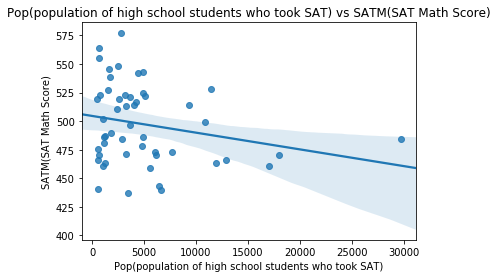

In [95]:
#1 numeric visualization
# Create a scatter plot after data manipulation with .pipe()
statesinfo_raw.pipe((sns.regplot, 'data'), # type of plot
      x = 'pop', # x-axis
      y = 'SATM')

#added labels and title
plt.xlabel('Pop(population of high school students who took SAT)') 
plt.ylabel('SATM(SAT Math Score)')
plt.title('Pop(population of high school students who took SAT) vs SATM(SAT Math Score)')
#Visualization shows weak relationship between pop( population of high school students who took SAT )
#and SAT Math score. Though the general direction as more students take the SAT, is lesser SAT Math score. 

Text(0.5,1,'Regions of US and their frequency of states in that region')

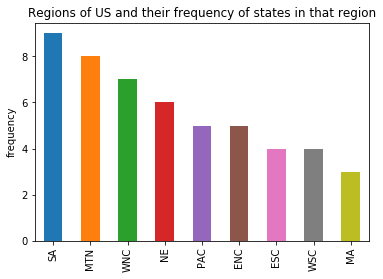

In [99]:
#1 categorical visualization
# Create a barplot by displaying counts

statesinfo_raw['region'].value_counts().plot(kind = "bar")
#ylabel and title
plt.ylabel('frequency')
plt.title('Regions of US and their frequency of states in that region')
#Visualization shows South Atlantic (SA), MTN(Mountain), WNC(West North Central) regions have highest frequency of 
#how many states are considered in that region.

In [102]:
#Note the BELOW was just for my understanding :D

#import linearRegression and plot modules
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [101]:
#1 numeric variable visualization with 1 numeric variable predictor

#predict pop( population of high school students who took SAT ) based on the other SATM in the dataset. 
X = statesinfo_raw.filter(['pop'])
#Separate the set of predictors from the response:
y = statesinfo_raw['SATM']
#Fit the model:
model = LinearRegression().fit(X, y)
# estimate the performance of our model with R-squared
model.score(X, y)


#Intrepret: The model accounts for only 5.29% of the variance in Y explained by X (R^2=0.0529). This Regression model 
#show's there not significant (very weak) relationship between pop( population of high school students who took SAT )
#and SAT Math score. 

0.05291921561565183

In [79]:
#import logistic regression and plot modules
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from scipy.special import expit

In [88]:
#1 categorical variable visualization with 1 numeric variable predictor

#predict divide (categorical variable) North or South US  based on the numeric variable pay (average teachers salary)
#separate the set of predictors from the response
X = statesinfo_raw.filter(['pay'])
y = statesinfo_raw['divide']
model = LogisticRegression().fit(X,y)
model.score(X, y)



0.6470588235294118